!pip install --upgrade imblearn
!pip install scikit-learn==1.0 -U

In [1]:
from collections import Counter


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [2]:
benign_raw_data= pd.read_csv("benign.txt", delimiter=" " ,header= None)
benign_raw_data = benign_raw_data.set_index(0)

In [3]:
benign_raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752
0,,,,,,,,,,,,,,,,,,,,,
Sample_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Sample_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Sample_2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Sample_3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Sample_4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
benign_raw_data[1753] = 0

In [5]:
benign_raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753
0,,,,,,,,,,,,,,,,,,,,,
Sample_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
Sample_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
Sample_2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Sample_3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
Sample_4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
maleware_raw_data= pd.read_csv("maleware.txt", delimiter=" ",header=None )
maleware_raw_data = maleware_raw_data.set_index(0)

In [7]:
maleware_raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752
0,,,,,,,,,,,,,,,,,,,,,
Sample_0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Sample_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Sample_4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [8]:
maleware_raw_data[1753]=1

In [10]:
maleware_raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753
0,,,,,,,,,,,,,,,,,,,,,
Sample_0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Sample_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Sample_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
Sample_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Sample_4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1


In [11]:
maleware_raw_data.shape

(45000, 1753)

In [12]:
benign_raw_data.shape

(20000, 1753)

In [13]:
all_data = pd.concat([maleware_raw_data, benign_raw_data], axis=0)

In [14]:
all_data.shape

(65000, 1753)

In [15]:
all_data.head()

,1,2,3,4,5,6,7,8,9,10,...,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753
0,,,,,,,,,,,,,,,,,,,,,
Sample_0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Sample_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Sample_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
Sample_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Sample_4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1


In [16]:
all_data_values = all_data.values

In [17]:
all_data_values

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [18]:
padvish_data, padvish_labels = all_data_values[:,:-1],all_data_values[:,-1]

pima_data, pima_labels = all_data_values[:,:-1],all_data_values[:,-1]

In [19]:
padvish_data

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [20]:
padvish_labels

array([1., 1., 1., ..., 0., 0., 0.])

In [22]:
padvish_data.shape

(65000, 1752)

In [23]:
padvish_labels.shape

(65000,)

In [25]:
padvish_data.shape, padvish_labels.shape

((65000, 1752), (65000,))

In [27]:
padvish_labels_classes = np.unique(padvish_labels)
padvish_labels_classes

array([0., 1.])

In [29]:
padvish_number_classes = len(padvish_labels_classes)

In [30]:
padvish_number_classes

2

In [31]:
for label in padvish_labels_classes:
    total = len(padvish_labels[padvish_labels==label])
    ratio = (total / float(len(padvish_labels))) * 100
    print(f' the number of class {label}  is {total} and the ratio of this class is {ratio} to all data')

 the number of class 0.0  is 20000 and the ratio of this class is 30.76923076923077 to all data
 the number of class 1.0  is 45000 and the ratio of this class is 69.23076923076923 to all data


In [32]:
X, Y = padvish_data, padvish_labels

In [33]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(Y)
n_classes = len(classes)

In [34]:
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)

N Examples: 65000
N Inputs: 1752
N Classes: 2
Classes: [0. 1.]


In [35]:
for c in classes:
    total = len(Y[Y == c])
    ratio = (total / len(Y)) * 100
    print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

 - Class 0.0: 20000 (30.76923%)
 - Class 1.0: 45000 (69.23077%)


In [39]:
X, Y

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([1., 1., 1., ..., 0., 0., 0.]))

# PREPARING VALIDATION DATA (eval.txt)

In [41]:
eval_raw_data= pd.read_csv("eval.txt", delimiter=" " ,header= None)
eval_raw_data = eval_raw_data.set_index(0)
eval_raw_data.head()
eval_values = eval_raw_data.values
print(f"the shape of eval data is {eval_values.shape}")

the shape of eval data is (10000, 1752)


In [42]:
eval_values

array([[0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# **RESAMPLING METHODS**

In [43]:
resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=1375,
        replacement=False,
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=1375,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [56]:
# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=1375,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=1375),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),

    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=1375,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=1375,
    ),
}

In [57]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test, validation_data):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=1375, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    validation = rf.predict_proba( validation_data)
    np.savetxt("RandomForestClassifierValidation.csv", validation, delimiter=",")

    return roc_auc_score(y_test, pred[:, 1])

In [58]:
# function to train random forests and evaluate the peadaormance

def run_adaboost(X_train, X_test, y_train, y_test, validation_data):

    ada = AdaBoostClassifier(n_estimators=20, random_state=1375)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ada.predict_proba(X_test)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    validation = ada.predict_proba( validation_data)
    np.savetxt("AdaBoostClassifierValidation.csv", validation, delimiter=",")

    return roc_auc_score(y_test, pred[:, 1])

In [59]:
# function to train random forests and evaluate the peensembleormance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test,  validation_data):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    validation = ensemble.predict_proba( validation_data)
    np.savetxt("EnsembleClassifierValidation.csv", validation, delimiter=",")

    return roc_auc_score(y_test, pred[:, 1])

In [60]:
  x_train, x_test, y_train, y_test = train_test_split(
    X,  
    Y, 
    test_size=0.3,
    random_state=1375)

In [61]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45500, 1752), (19500, 1752), (45500,), (19500,))

In [62]:
results_dict = {}
# we set variables in the same scale
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
eval_values_transform = scaler.transform(eval_values)
    
# train model and store result
roc = run_randomForests(x_train, x_test, y_train, y_test, eval_values_transform)
results_dict["Random Forest"] = roc
print()
# train model and store result
roc = run_adaboost(x_train, x_test, y_train, y_test, eval_values_transform)
results_dict["adaboost"] = roc
print()


Train set
Random Forests roc-auc: 0.9386528851794639
Test set
Random Forests roc-auc: 0.9413415540701979

Train set
AdaBoost roc-auc: 0.9775957650872671
Test set
AdaBoost roc-auc: 0.9771078477561688



In [66]:
for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        x_resampled, y_resampled = resampling_dict[sampler].fit_resample(x_train, y_train)
        
        # train model and store result
        roc = run_randomForests(x_resampled, x_test, y_resampled, y_test,  eval_values_transform)
        results_dict[sampler] = roc
        print()
    
        for ensemble in ensemble_dict.keys():
        
          print(ensemble)
          
          # train model and store result
          roc = run_ensemble(ensemble_dict[ensemble], x_train, x_test, y_train, y_test, eval_values_transform)
          results_dict[ensemble] = roc
          print()
          

random
Train set
Random Forests roc-auc: 0.9396542672440233
Test set
Random Forests roc-auc: 0.9418451494225245

balancedRF


C:\Users\mehrdad\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Train set
ensembleBoost roc-auc: 0.9527044314745017
Test set
ensembleBoost roc-auc: 0.9548710484198506

bagging


KeyboardInterrupt: 

In [67]:
results_dict

{'Random Forest': 0.9413415540701979,
 'adaboost': 0.9771078477561688,
 'random': 0.9418451494225245,
 'balancedRF': 0.9548710484198506}

# adaboost was better for maleware detection in question 1

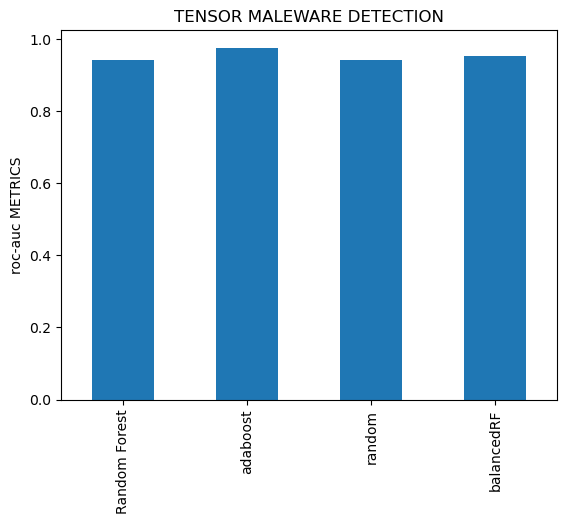

In [68]:
pd.Series(results_dict).plot.bar()
plt.title("TENSOR MALEWARE DETECTION")
plt.ylabel('roc-auc METRICS')
plt.show()